**Task:** Data analysis of a Titanic dataset with Pandas

Download Titanic dataset

Load data to pandas dataframe

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_excel('Data/titanic.xls')

In [4]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
data.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [6]:
data.shape

(1309, 14)

# Please, answer the following questions with code and output or visualizations below each question.

### What  is  the  passenger  sex  distribution? 

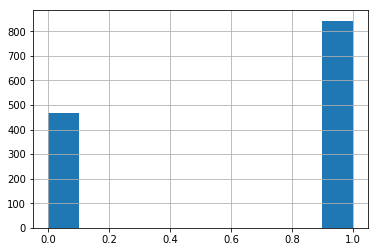

In [7]:
data['sex'].map(lambda x: int(x=='male')).hist()

In [8]:
data.groupby(['sex']).count()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
sex,,,,,,,,,,,,,
female,466,466,466,388,466,466,466,466,141,464,319,8,288
male,843,843,843,658,843,843,843,842,154,843,167,113,457


### What  is  the  passenger  service  class  distribution? 

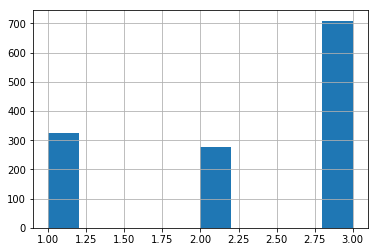

In [8]:
data['pclass'].hist()

In [9]:
[data.loc[data['pclass'] == x, 'pclass'].count() for x in data['pclass'].unique()]

[323, 277, 709]

### How  does  the  mean  male  age  change  in  dependence  on  service  class? 

#### The higer class is, the older men belong to it.

In [10]:
data[data['sex'] == 'male'].groupby(['pclass'])['age'].mean()

pclass
1    41.029250
2    30.815401
3    25.962273
Name: age, dtype: float64

### How  does  the  mean  female  age  change  in  dependence  on  service  class? 

#### The higer class is, the older women belong to it.

In [11]:
data[data['sex'] == 'female'].groupby(['pclass'])['age'].mean()

pclass
1    37.037594
2    27.499191
3    22.185307
Name: age, dtype: float64

### What  is  the  proportion  of  survived  passengers?

In [12]:
data['survived'].mean().round(2)

0.38

### Is  it  true,  that  younger  passengers  survived  more  frequently  than  older passengers?

#### So, as we can see from the hist, it's quite true, but to answer correctly, we have to draw a hist, that will show percent of survived people for each age, but not the absolute count.

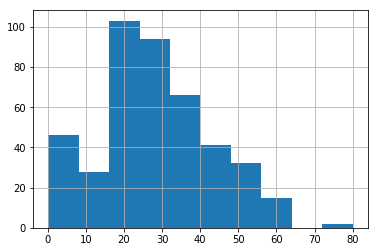

In [13]:
data.loc[data['survived']==1, 'age'].hist()

#### As we can see from the graph below, it's true even in percent of survival people

In [54]:
def survival_percent(age):
    answer = data.groupby(lambda x: (age-10 < data.loc[x, 'age'] < age))['survived'].mean()[True]
    return answer

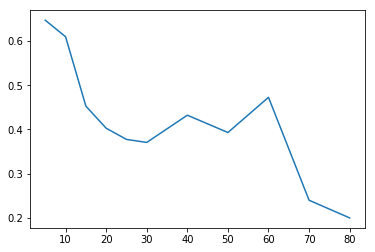

In [74]:
plt.plot([5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80], [survival_percent(x) for x in [5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80]])

### Is  it  true,  that  women  survived  more  frequently? 

#### Yep, that's definitly true!

In [76]:
data.groupby('sex')['survived'].mean()

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

### What  is  the  mean  of  the  fare?  What  is  the  variance  of  the  fare? 

#### Fare is the money, payed for the ticket.

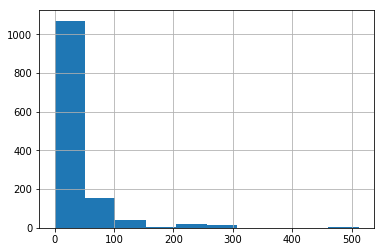

In [97]:
data['fare'].hist()

#### Here is dependence between class and fare.

In [100]:
data.groupby('pclass')['fare'].mean()

pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64

### Is  it  true,  that  passengers  with  more  expensive  tickets  survived  more frequently?

#### Yes, it is.

In [89]:
data.groupby('survived')['fare'].mean()

survived
0    23.353831
1    49.361184
Name: fare, dtype: float64

### What  is  most  popular  male  name  on  the  ship? 

In [94]:
data.loc[data['sex'] == 'male', 'name'].value_counts().idxmax()

u'Kelly, Mr. James'